<a href="https://colab.research.google.com/github/shirleymbeyu/Spotify/blob/master/spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is based on the reccomendation given in the first part of the project to re-do the analysis with improved visualization methods. 

In addition to that, a new approach was employed to check for the behavior of the averagely popular tracks. That is tracks with a popularity index of above 50.

## Assumption

With the analysis focusion only in tracks with the top half popularity index, it is assumed that the bottom half will behave directly opposite to the other half, unless for the cases where the actual analysis for the bottom half is done

## Setting workspace

In [25]:
#importing the libraries to be used in the project
import numpy as np
import pandas as pd

#libraries to be used for visualization
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns


## Loading data set and checking outliers

In [26]:
#Loading our data set and checking its shape:
spotify = pd.read_csv('spotify_df.csv')
spotify.shape

(28349, 18)

In [27]:
#Creating a new data frame that contains observations with a track popularity index of above 50: 
pops = spotify[(spotify.track_popularity>50)]
pops.shape

(10502, 18)

The data has reudced to 37.05% of the previous which is relatively ok to work with

In [28]:
#Creating a new data frame with continuous variables of a range(0.0-1.0)
cont = pops[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence']]
cont

,danceability,energy,speechiness,acousticness,instrumentalness,valence
0,0.748,0.916,0.0583,0.102000,0.000000,0.5180
1,0.726,0.815,0.0373,0.072400,0.004210,0.6930
2,0.675,0.931,0.0742,0.079400,0.000023,0.6130
3,0.718,0.930,0.1020,0.028700,0.000009,0.2770
4,0.650,0.833,0.0359,0.080300,0.000000,0.7250
...,...,...,...,...,...,...
28258,0.593,0.907,0.0477,0.005690,0.000637,0.2330
28267,0.709,0.840,0.1230,0.000388,0.467000,0.0639
28281,0.552,0.831,0.0298,0.039100,0.000003,0.1440
28320,0.567,0.796,0.0364,0.024700,0.000000,0.3050


Text(0.5, 1.0, 'Continous Variables')

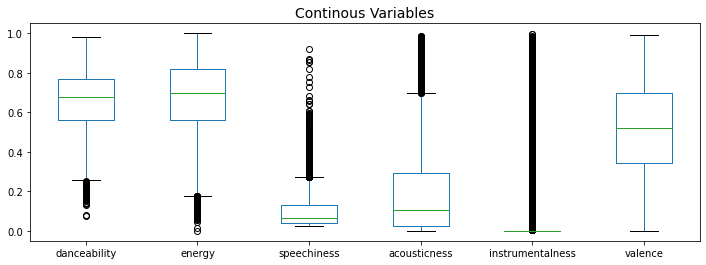

In [29]:
cont.boxplot(grid=False, figsize=(12,4))
plt.title("Continous Variables", fontsize=14)

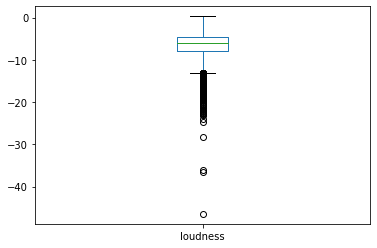

In [30]:
#Checking for outliers in the loudness continuous variable:
pops.boxplot(column =['loudness'], grid = False)

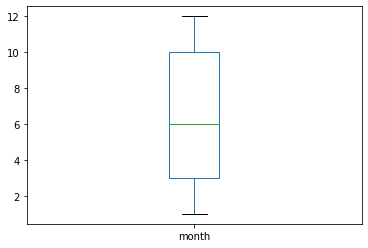

In [31]:
#Finding otliers in track popularity:
pops.boxplot(column =['month'], grid = False)

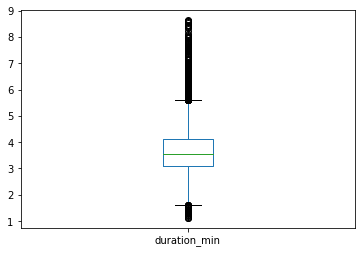

In [32]:
#Checking for outliers in the loudness continuous variable:
pops.boxplot(column =['duration_min'], grid = False)

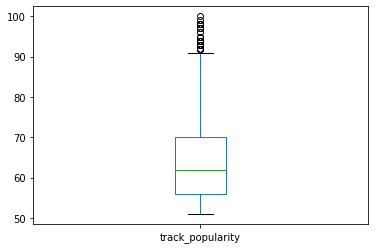

In [33]:
#Finding otliers in track popularity:
pops.boxplot(column =['track_popularity'], grid = False)

#Questions

1. How are the track observations distributed over the years?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb595f20390>,
      dtype=object)

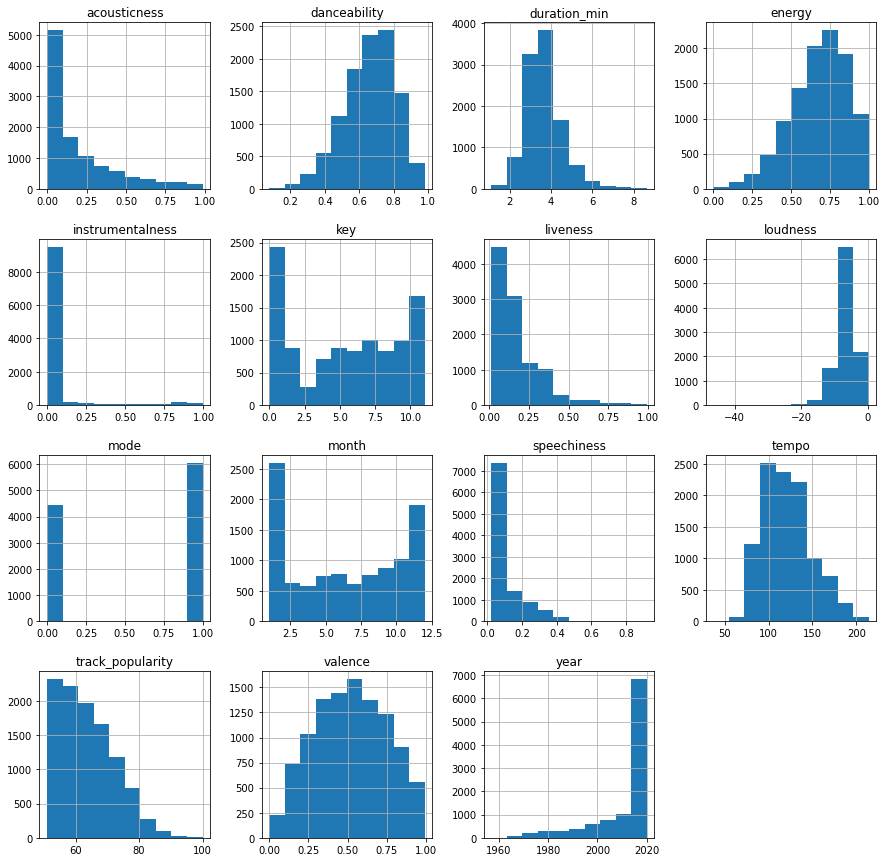

In [34]:
#finding the distribution of the observations in the data set
pops.hist(figsize=(15,15))

These distribution graphs go ahead to prove the observations in from the boxplots.

2. How are these variables related to track popularity?

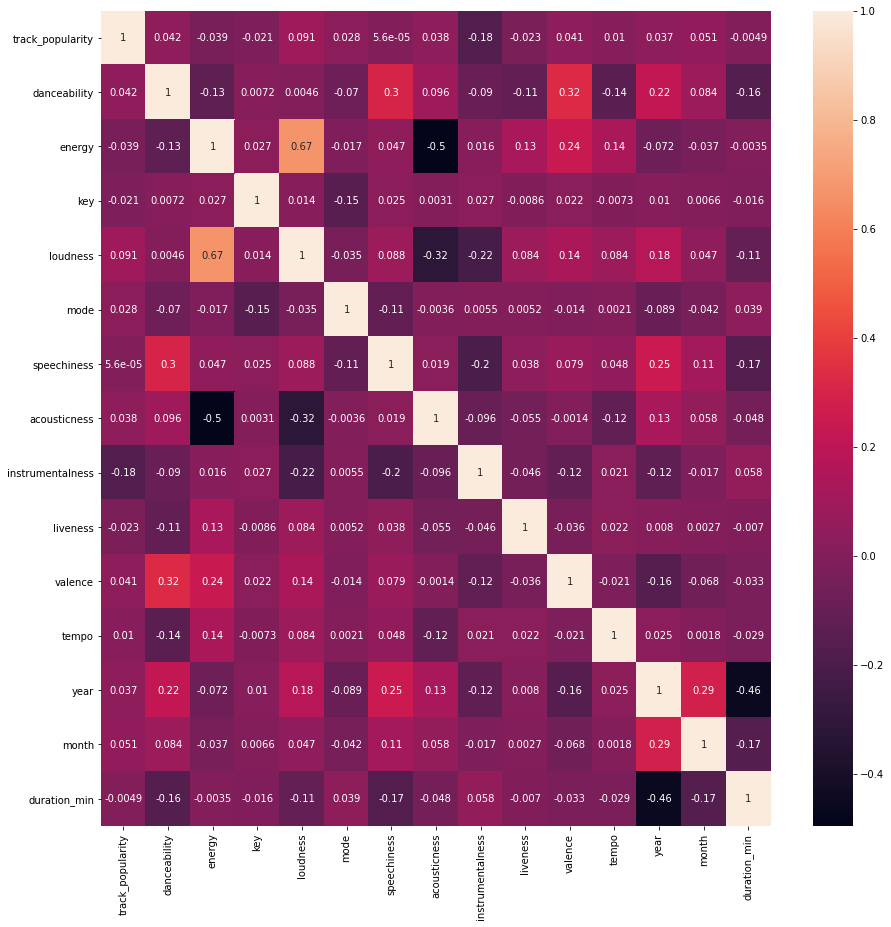

In [35]:
#Checked for the relationship between the various varaibles.
#This was done with a correlation co-efficient matrix:
corr = pops.corr(method = 'spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

None of the variables had a corelation co-efficients above or even close to +/-0.5(that are strong relationship) to the track_popularity. Therefor none are worth mentioning

This shows that none of the variables are significantly proportional to track_popularity, that is; track popularity cannot be defined solely on a particular variable but a number or rather a combination of them.

From here on the analysis will focus on those with a co-efficient of 0.1 on both ends or close to that:

months has a positive weak correlation of 0.036

instrumentalness has a weak negative correlation of -0.17

loudness has a weak positive correlation of 0.12


Other uniques variables that are interesting to look at are:

duration_min


3. Virtually, how does instrumentalness affect track popularity?

**Summary of analysis on the Instrumentalness variable:**

It has no strong relationship with any other variabes.

Many outliers were located at the top end, from the boxplot

Most of the observations which were above 8,000 were at the indexes below 0.125 and the rest of the indexes having observations way below 1000, from the histogram. 

From those two later observations it would be interesting to analyze the tracks with low instrumentalness instead since that is where more than a third of the data is located.





In [36]:
#Creating a dataset to hold the observation having instrumentalness below 01
low_inst = pops[(pops.instrumentalness<0.1)]


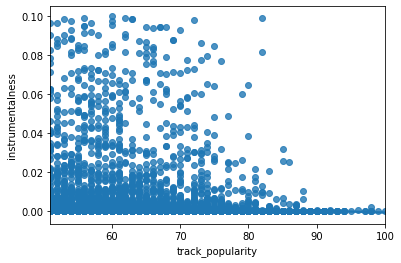

In [37]:
#A scattter plot with regression line  of instrumentalness against popularity:
sns.regplot(x = low_inst['track_popularity'], y = low_inst['instrumentalness'])


From the scatter plot it is clear that tracks with really low instrumentalness dominate the top most popular positions(in acodance to the negative correlation betwen the two) with only a few being popular with high instrumentalness. 

But this is aguable that it is only so, because of the large number of tracks with low instrumentalnes.

Therefore this rules out instrumentalness as a variable that can be used to predict track popularity.

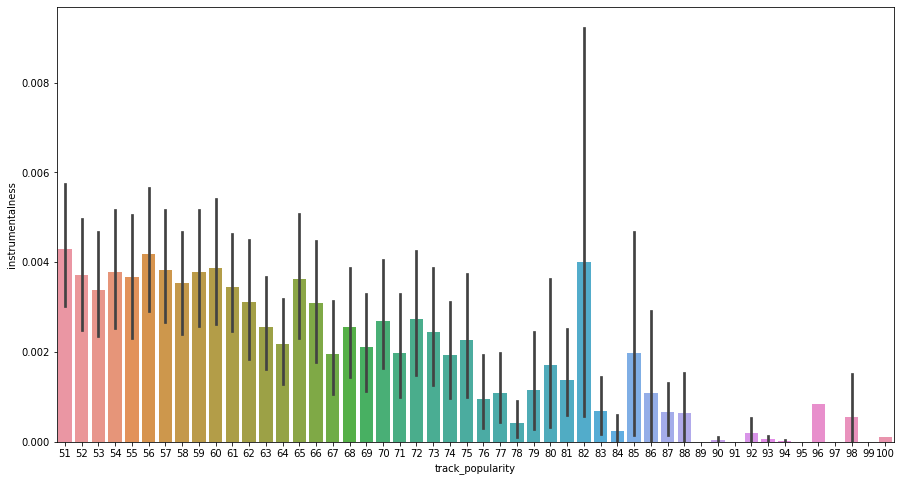

In [38]:
#Creating a bar plot for further visualization and insights.
plt.figure(figsize=(15, 8))
sns.barplot(x = low_inst['track_popularity'], y = low_inst['instrumentalness'])

From the bar plot above, tracks with a popularity index of 89 and above have very low instrumentalness. Therefor very low instrumentalness could be a starting point for having a very popular track.


To kinda prove that, Lemme check the popularity for tracks with instrumentalness of above 0.1:

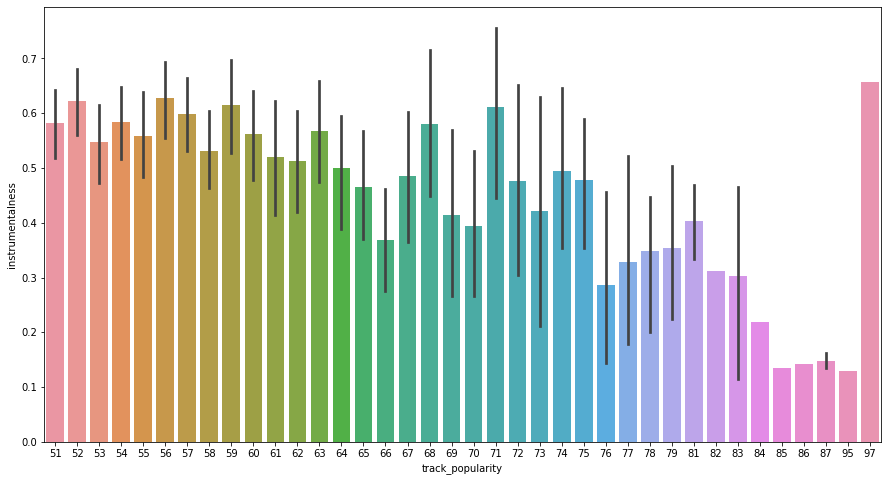

In [39]:
high_inst = pops[(pops.instrumentalness>0.1)]
plt.figure(figsize=(15, 8))
sns.barplot(x = high_inst['track_popularity'], y = high_inst['instrumentalness'])

There are numerous missing popularity indexes (80, 88, 89, 90, 91, 92, 93, 94, 96, 98, 99, 100)

This proves that there is a high likely-hood of a track being really popular with an instrumentalness of below 0.1

4. How does loudness affect track popularity:

The negative values indicate the sound is a few times softer than threshold.

**Summary over-view of the variable loudness:**

It has a strong positive correlation co-efficient with energy of 0.65



Most of the outliers were between -14 to -26 with a few being below that, according to the boxplot

The distribution histogram shows that there are 6,000 entries between -9.9 to -4.9, slightly above 2,000 between -4.9 and 0 and around 1500 between -14.8 to -9.9



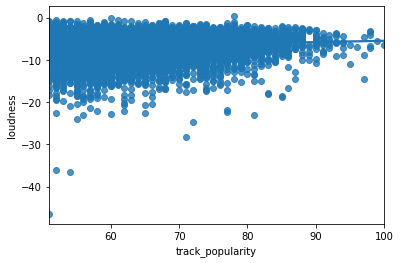

In [40]:
sns.regplot(x= pops['track_popularity'], y=pops['loudness'])

From the above most of the popular tracks are relatively loud, that is between -5 and -15, that is relatively loud.

There are no soft popular tracks, that is below -20.

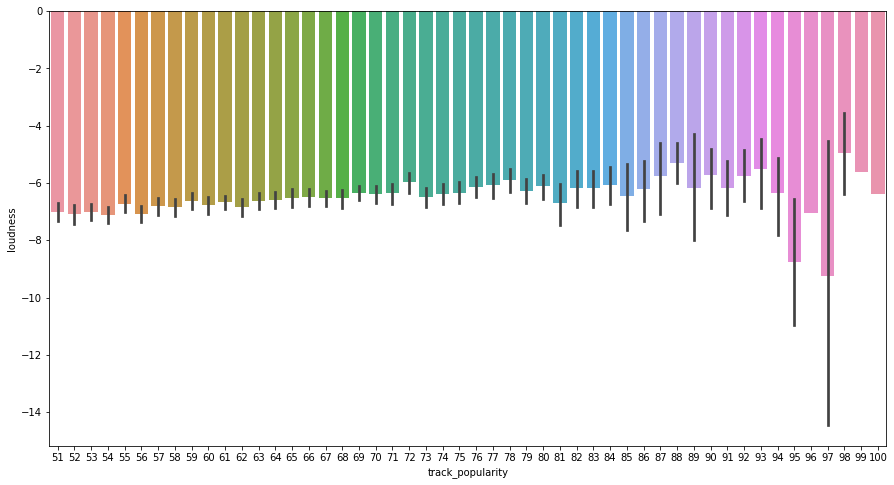

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x= pops['track_popularity'], y=pops['loudness'])

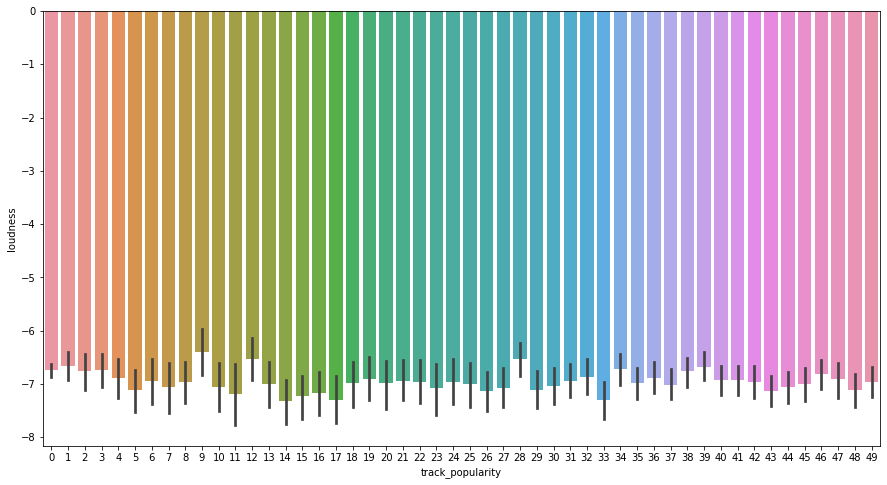

In [42]:
#bar plot for tracks with popularity index below 50
low_pop = spotify[(spotify.track_popularity<50)]
plt.figure(figsize=(15,8))
sns.barplot(x= low_pop['track_popularity'], y=low_pop['loudness'])


From the two bar plots it is evident that the loudness of almost all the popularity indexes is above -8db.For less popular tracks all are between -6 and -8.

An exception is with the popular tracks where some are above -6db and others between -8db to about -14db (the 96 and 97 popularity indexes).

From the two observations it is safe to say that a track with loudness below -8db and above -6db is popular.

5 (a) Which month had the most track releases over the years?

**Summary over-view of the month variable**

It  had no outliers

In [43]:
monthly_tracks = spotify['track_name'].groupby([spotify['month']]).count().sort_values(ascending=False)
monthly_tracks[:3]

month
1     6137
11    2875
10    2611
Name: track_name, dtype: int64

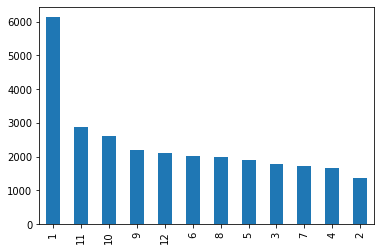

In [44]:
spotify['month'].value_counts().plot(kind='bar')

(b) Which month had the most popular (above 50) track releases over the years?

In [45]:
month_of_pops = spotify[(spotify.track_popularity>50)].groupby('month')['track_name'].count().sort_values(ascending = False)
month_of_pops[:3]


month
1     2101
11    1141
10    1030
Name: track_name, dtype: int64

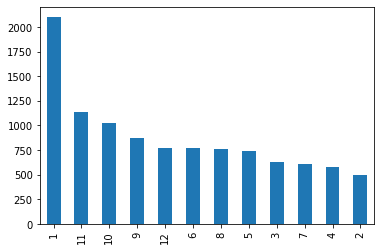

In [46]:
pops['month'].value_counts().plot(kind='bar')


The months are in the same order as those with many track releases over the years


(C) Virtually, how does the month of track release affect the track_popularity?

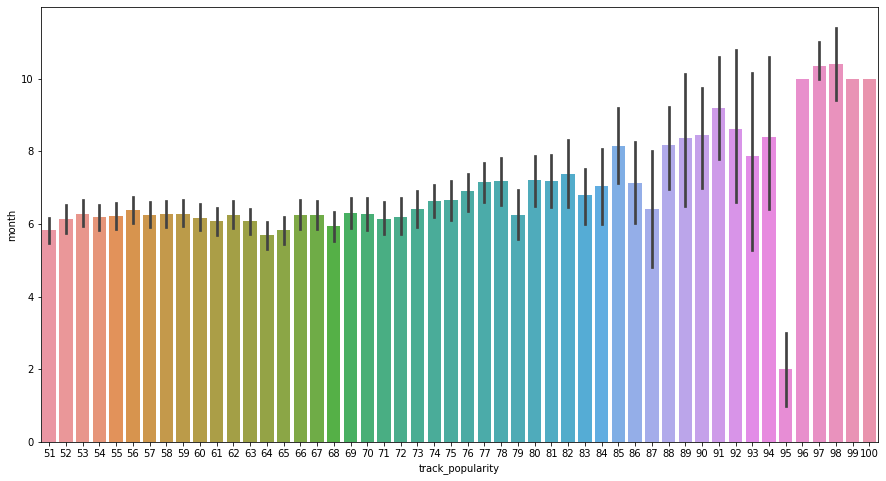

In [47]:
#Bar plot of tracks with popularity index above 50
plt.figure(figsize=(15, 8))
sns.barplot(x = pops['track_popularity'], y = pops['month'])

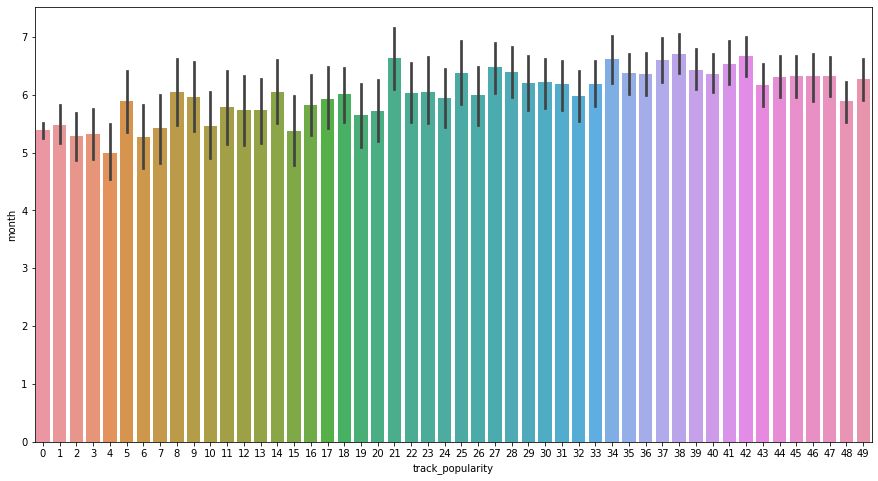

In [48]:
#bar plot of tracks with polarity index below 50
plt.figure(figsize=(15,8))
sns.barplot(x= low_pop['track_popularity'], y=low_pop['month'])

On average most popular tracks(51-75) are released in the mid of the year.This changes to the last half of the year, towards the high popular indexes(above 85).

But it is important to note the exception that the mean of tracks with a popularity index of 95 were released between the month of January(1) and March(3)  with the mean being in February(2)

For less popular tracks their release onth seem to be all before the 7th Month(though not many of them are even release in this month) and after the 4th month.

From those observation it is then safe to say that most popular tracks are released after the 8th month and before the 3rd month.

6. (a) Virtually, how does the duration of a track affect its popularity?

**Summary over-view of the duration variable:**

Outliers were between 6 and 9 minutes and also below 1.5 minutes.

From the distribution plot, most of the tracks were between 3.2 and 4 seconds

It has a weak negative correlation with the year variable of -0.48

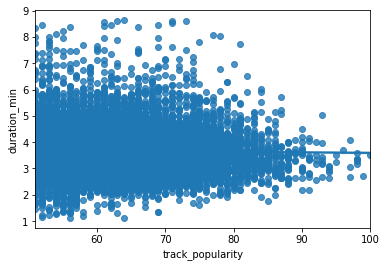

In [49]:
#Finding out whether and how track duration affects tack popularity
sns.regplot(x = pops['track_popularity'], y = pops['duration_min'])


From the scatter plot above, the regression line seems to be straight hence not giving clear meaning


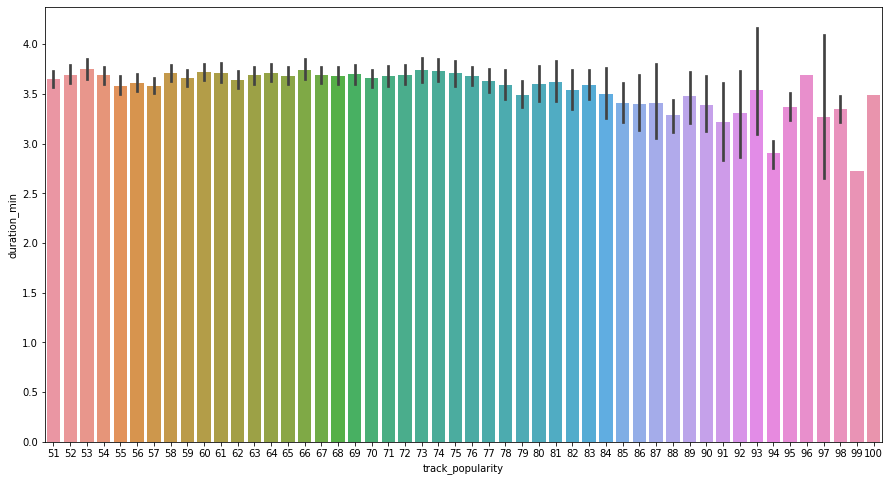

In [50]:
#Bar plot for tracks with high popularity indexes
plt.figure(figsize=(15, 8))
sns.barplot(x = pops['track_popularity'], y = pops['duration_min'])

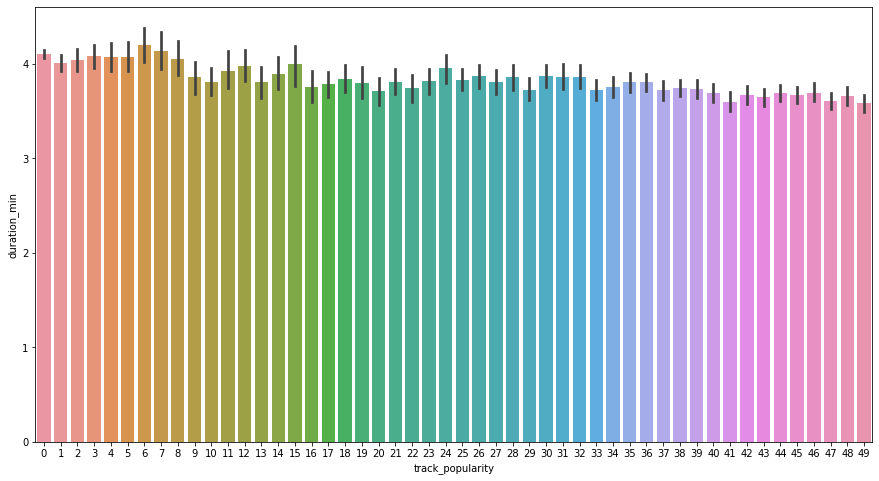

In [51]:
#Bar plot for tracks with low popularity index
plt.figure(figsize=(15, 8))
sns.barplot(x = low_pop['track_popularity'], y = low_pop['duration_min'])

Most of the tracks on all popularity indexes are beyond 3.5 minutes

The only exceptions come out clearly  in the 94 and 97 popularity indexes in which the tracks here are below 3.0 minutes.

From that it could be safe to say that a track below 3.5 minutes is likely to be popular.



(b) What is the average duration of most popular tracks?


In [52]:
avg_duration_of_pops = pops.groupby('duration_min')['track_name'].count().sort_values(ascending = False)
avg_duration_of_pops

duration_min
2.666667    10
4.000000     9
3.500000     8
3.250000     8
3.066667     8
            ..
3.861117     1
3.861267     1
3.861333     1
3.861350     1
1.113100     1
Name: track_name, Length: 8699, dtype: int64

From the top 5 popular minutes, 3 of them are below 3.5


# Next step

Building a model to predict track popularity